### Treść zadania

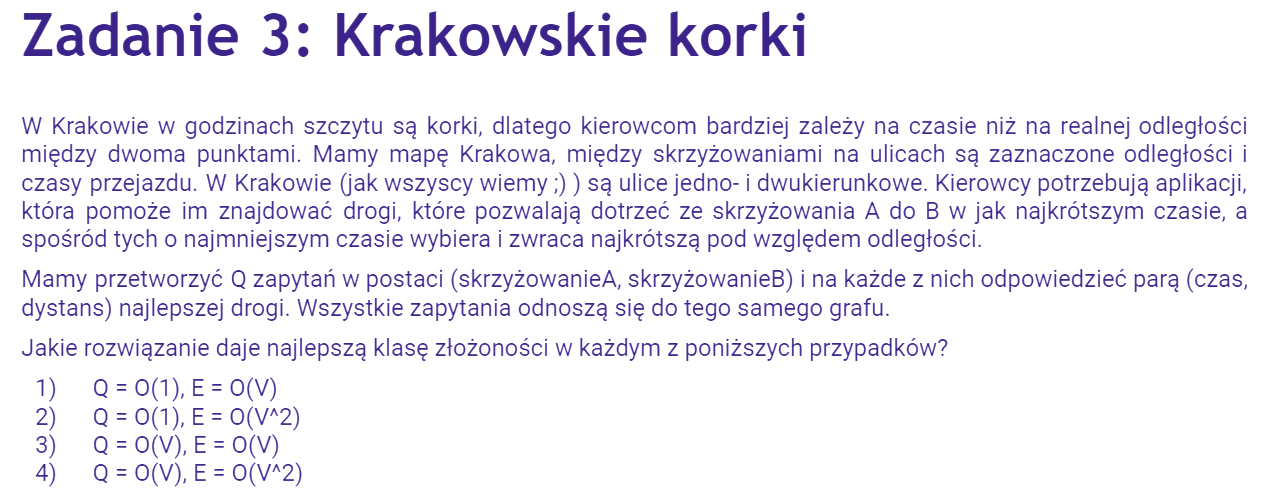

### Ogólne omówienie problemu

Mamy dokładnie w poleceniu określone kryteria, według których należy wybierać ścieżki. Priorytetem jest dla nas czas dojazdu, więc najpierw będziemy szukali ścieżek o najkrótszym czasie przejazdu. Jeżeli jednak będzie kilka takich ścieżek, to dopiero wtedy będziemy wybierać ścieżkę o najmniejszej długości. W zależności od liczby zapytań, jakie otrzymujemy, opłacalne będzie zastosowanie innego algorytmu, który wyznacza najkrótsze ścieżki.

### Porównanie złożoności algorytmów dla poszczególnych problemów

Jeszcze na wstępie warto nadmienić, iż pod uwagę bierzemy jedynie algorytm Dijkstry oraz Floyda-Warshalla. Nie opłaca nam się kompletnie korzystać z algorytmu Bellmana-Forda (choć umieściłem go w poniższym porównaniu złożoności, aby pokazać, że nie jest on dobrym wyborem), ponieważ nigdy nie będziemy mieli ujemnych wag krawędzi. Algorytm Floyda-Warshalla ma jedynie sens, ponieważ jest bardzo prosty i wyznacza od razu długości ścieżek między każdą parą wierzchołków, co może nam się opłacić, gdy mamy dużo zapytań o trasy i graf jest grafem gęstym.
###### 1) $ Q = O(1), E = O(V) $:
Odpowiedź jest prosta, ponieważ mamy graf rzadki i szukamy tylko jednej ścieżki. Z tego powodu powinniśmy skorzystać z algorytmu Dijkstry dla reprezentacji listowej grafu.
- Dijkstra: <br>
$ O(Q \cdot E \cdot log(V)) = | Q = O(1), E = O(V) | = O(V \cdot log(V)) $,
- Bellman-Ford: <br>
$ O(Q \cdot E \cdot V) = | Q = O(1), E = O(V) | = O(V^2) $,
- Floyd-Warshall: <br>
$ O(Q + V^3) = | Q = O(1) | = O(V^3) $

###### 2) $ Q = O(1), E = O(V^2) $:
Tym razem na wejściu dostajemy graf gęsty. Z tego powodu warto jest go trzymać w postaci macierzowej, ponieważ wówczas można użyć algorytmu Dijkstry, który działa w czasie $ O(V^2) $ (czyli szybciej niż implementacja standardowa w oparciu o kolejkę priorytetową, bo $ O(E \cdot log(V)) = | E = O(V^2) | = O(V^2 \cdot log(V)) > O(V^2) $). W tym przypadku mamy również tylko jedno zapytanie, więc algorytm Dijkstry ma jedynie sens.
- Dijkstra: <br>
$ O(Q \cdot V^2) = | Q = O(1) | = O(V^2) $,
- Bellman-Ford: <br>
$ O(Q \cdot E \cdot V) = | Q = O(1), E = O(V^2) | = O(V^3) $,
- Floyd-Warshall: <br>
$ O(Q + V^3) = | Q = O(1) | = O(V^3) $

###### 3) $ Q = O(V), E = O(V) $:
Teraz mamy już $ Q = O(V) $ zapytań, ale wciąż graf jest grafem rzadkim. W tym przypadku wciąż najlepszym wyborem jest algorytm Dijkstry, ponieważ ma najniższą złożoność (oczywiście dla grafu w reprezentacji listowej).
- Dijkstra: <br>
$ O(Q \cdot E \cdot log(V)) = | Q = O(V), E = O(V) | = O(V \cdot V \cdot log(V)) = O(V^2 \cdot log(V)) $,
- Bellman-Ford: <br>
$ O(Q \cdot E \cdot V) = | Q = O(V), E = O(V) | = O(V \cdot V \cdot V) = O(V^3) $,
- Floyd-Warshall: <br>
$ O(Q + V^3) = | Q = O(V) | = O(V + V^3) = O(V^3) $

###### 4) $ Q = O(V), E = O(V^2) $:
W tym przypadku mamy znów $ Q = O(V) $ zapytań, ale graf jest już grafem pełnym. Teraz zaczyna nam się w końcu opłacać wybrać inny algorytm niż algorytm Dijkstry (choć jeżeli chodzi o złożoność, to dla algorytmu Dijkstry jest ona taka sama jak dla Floyda-Warshalla). Mimo wszystko, algorytm Floyda Warshalla pozwala nam na łatwiejsze pozyskanie wyniku od razu dla każdego z zapytań po jednym przejściu przez graf oraz jest łatwiejszy w implementacji. W przypadku algorytmu Dijkstry, ponownie wykorzystujemy reprezentację macierzową grafu, ponieważ wówczas Dijkstra działa szybciej.
- Dijkstra: <br>
$ O(Q \cdot V^2) = | Q = O(V) | = O(V \cdot V^2) = O(V^3) $,
- Bellman-Ford: <br>
$ O(Q \cdot E \cdot V) = | Q = O(V), E = O(V^2) | = O(V \cdot V^2 \cdot V) = O(V^4) $,
- Floyd-Warshall: <br>
$ O(Q + V^3) = | Q = O(V) | = O(V + V^3) = O(V^3) $

<br><br>

##### Dodatkowe oszacowania złożoności
Zamieszczam poniższe podpunkty z tego względu, że chcąc użyć algorytm Dijkstry, zastosujemy w obu z nich nieco inne podejście. Wcześniej opłacało nam się wywoływać Dijkstrę osobno przy każdym kolejnym zapytaniu, ponieważ wówczas liczba zapytań była rzędu $ O(1) $ lub $ O(V) $, czyli nigdy nie przekraczała liczby $ V $ równej liczbie wierzchołków w grafie. Jeżeli jednak liczba zapytań jest większa od $ V $ ($ Q = Ω(V) $ - tzn. $ V $ jest dolnym ograniczeniem na liczbę zapytań), mamy pewność, że dla jakiegoś z miast już wcześniej wyznaczaliśmy najkrótsze (w tym zadaniu raczej najszybsze, bo pierwsze skrzypce gra czas) ścieżki do wszystkich innych wierzchołków, więc niepotrzebnie powtarzamy sobie robotę. Zamiast postępować głupio i za każdym razem puszczać osobno algorytm Dijkstry, możemy utworzyć macierz kwadratową o rozmiarach $ V \times V $ i po każdym zapytaniu, jeżeli wcześniej nie startowaliśmy Dijkstry z danego wierzchołka początkowego, wywołalibyśmy algorytm Dijkstry z tego wierzchołka i zapisali wszystkie długości ścieżek w wierszu macierzy długości/wag ścieżek o indeksie, który odpowiada wierzchołkowi, z którego puściliśmy Dijkstrę. Jeżeli jednak wcześniej już wyznaczaliśmy najkrótsze ścieżki z danego wierzchołka $ s $, po prostu odczytujemy wynik z macierzy w czasie $ O(1) $ (albo odtwarzamy scieżkę w czasie zależnym od jej długości, jeżeli również szukamy ścieżek i mamy tablicę rodziców lub zwracamy już zapisaną ścieżkę, jeżeli zapisujemy wszystkie w pamięci, choć takie podejście ma złożoność pamięciową $ O(V^2 \cdot V) = O(V^3) $, bo mamy $ O(V^2) $ różnych par wierzchołków i potencjalnie dlugość każdej jest ograniczona przez liczbę wierzchołków w grafie (bo to jest ścieżka, więc nigdy nie przejdzie więcej niż raz przez wierzchołek)). Jest to taki trochę algorytm dynamiczny ze spamiętywaniem poprzednio obliczonych rozwiązań.

###### (Dodatkowo) $ Q = Ω(V), E = O(V) $
Z wykorzystaniem spamiętywania rozwiązań. Ponieważ graf jest grafem rzadkim, to dla Dijkstry bierzemy reprezentację listową. Jak zobaczymy niżej, mimo dużej liczby zapytań (nieograniczonej od góry), algorytm Dijkstry wciąż wygrywa.
- Dijkstra: <br>
$ O(Q + V \cdot E \cdot log(V)) = | E = O(V) | = O(Q + V \cdot V \cdot log(V)) = O(Q + V^2 \cdot log(V)) $,
- Bellman-Ford: <br>
$ O(Q + V \cdot E \cdot V) = | E = O(V) | = O(Q + V^3) $,
- Floyd-Warshall: <br>
$ O(Q + V^3) $

###### (Dodatkowo) $ Q = Ω(V), E = O(V^2) $
Tym razem mamy remis Dijkstry z Floydem-Warshallem. Oczywiście dla Dijkstry bierzemy algorytm pracujący na macierzy bez kolejki. Jak jest remis, to lepiej wybrać w tym przypadku algorytm Floyda-Warshalla, bo jest znacznie mniej zachodu z dostosowaniem Dijkstry do pracy na macierzy 2-wymiarowej (z Dijkstrą jest więcej problemów w implementacji, zwłaszcza Dijkstrą na macierzy).
- Dijkstra: <br>
$ O(Q + V \cdot V^2) = O(Q + V^3) $,
- Bellman-Ford: <br>
$ O(Q + V \cdot E \cdot V) = | E = O(V^2) | = O(Q + V^4) $,
- Floyd-Warshall: <br>
$ O(Q + V^3) $

# Dijkstra na listach bez spamiętywania
### (Dla $ Q = O(1) $, $ Q = O(V) $ oraz $ E = O(V) $)

### Implementacja #1
##### (Tylko znajdowanie czasu i dystansu - jak w poleceniu) 

In [2]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    n = len(G)
    inf = float('inf')
    times = [inf] * n
    distances = [inf] * n
    pq = PriorityQueue()
    pq.put((0, 0, s))

    while not pq.empty():
        min_time, curr_dist, u = pq.get()
        # Because all elements in a priority are sorted by min_time first and
        # then by dist in a non-decreasing order, we will always get a path of
        # the lowest time first and if there is more than one path of the lowest
        # time, we will get a path of the lowest distance among these paths
        if min_time < times[u]:  # We can check only this condition (see a comment above)
            times[u] = min_time
            distances[u] = curr_dist
            # Break a loop if we found a shortest path to the specified target
            if u == t: break
            # Add all the neighbours of the u vertex to the priority queue (to which
            # we haven't found the shortest path yet)
            for v, time, dist in G[u]:
                if times[v] == inf:
                    pq.put((min_time + time, curr_dist + dist, v))
                
    return times, distances


def shortest_route_dist(G: 'graph of a city with times and distances', s: 'start crossing', t: 'end crossing'):
    times, distances = dijkstra(G, s, t)
    # If a crossing is impossible to reach
    if times[t] == float('inf'):
        return (-1,) * 2
    return times[t], distances[t]

###### Kilka testów

##### Pomocnicze:

In [3]:
def create_city_graph(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append(e[1:])
    return G

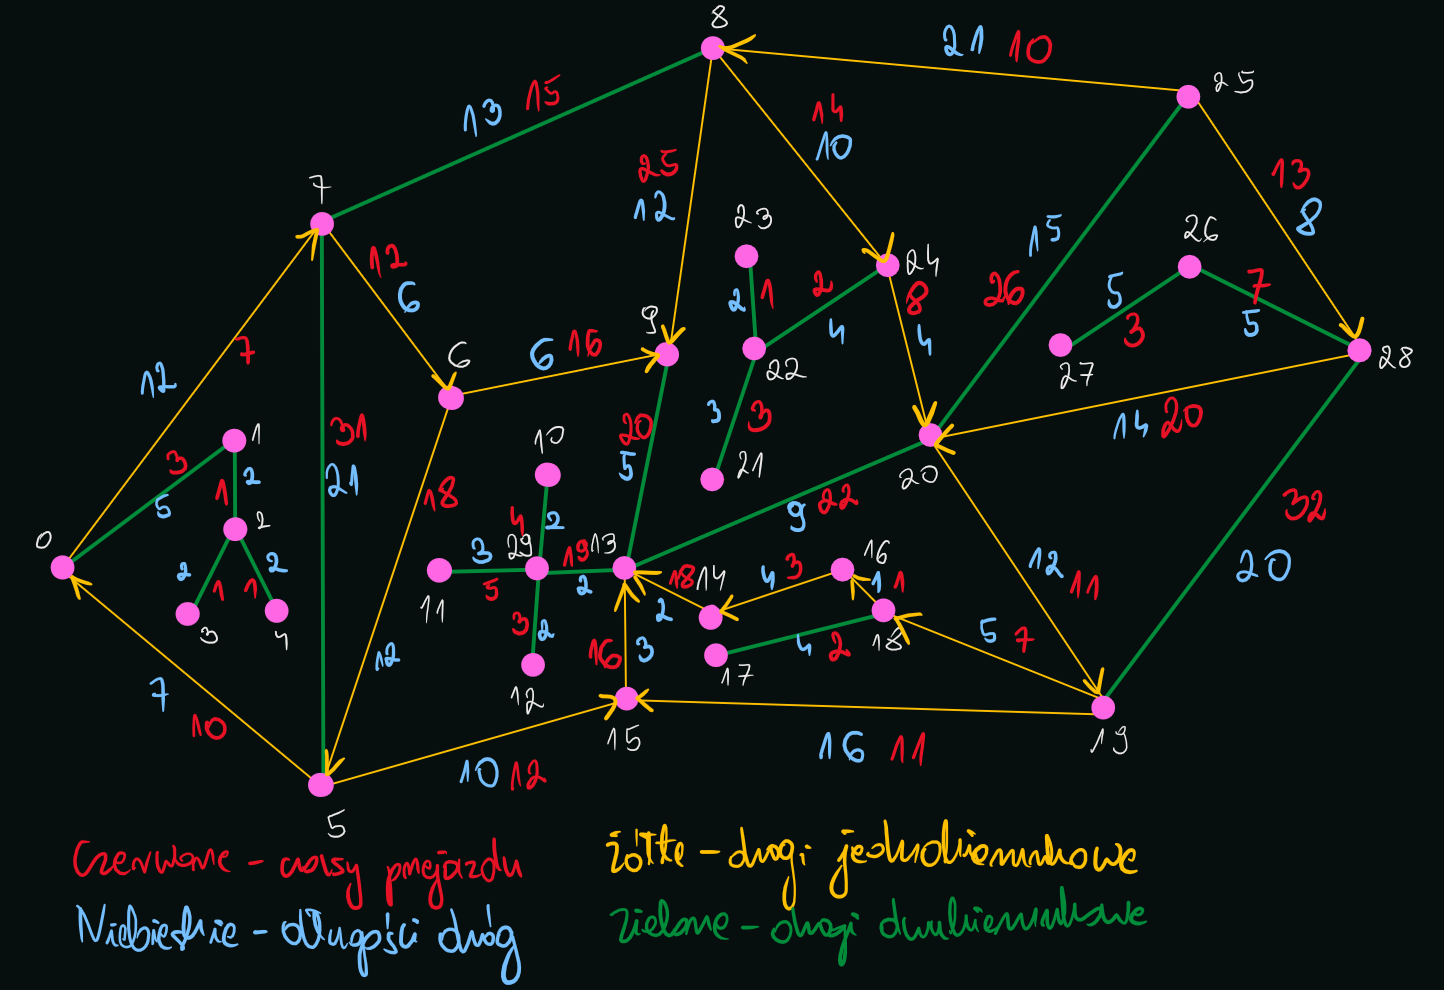

In [4]:
E = [(0, 7, 7, 12), (0, 1, 3, 5), (1, 0, 3, 5), (1, 2, 1, 2), (2, 1, 1, 2), (2, 3, 1, 2), (3, 2, 1, 2),
     (2, 4, 1, 2), (4, 2, 1, 2), (5, 0, 10, 7), (5, 7, 31, 21), (5, 15, 12, 10), (6, 9, 16, 6), (6, 5, 18, 12),
     (7, 5, 31, 21), (7, 6, 12, 6), (7, 8, 15, 13), (8, 7, 13, 15), (8, 9, 25, 12), (8, 24, 14, 10),
     (9, 13, 20, 5), (10, 29, 4, 2), (11, 29, 5, 3), (12, 29, 3, 2), (13, 29, 19, 2), (13, 9, 20, 5), 
     (13, 20, 22, 9), (14, 13, 18, 2), (15, 13, 16, 3), (16, 14, 3, 4), (17, 18, 2, 4), (18, 17, 2, 4), 
     (18, 16, 1, 1), (19, 28, 32, 20), (19, 18, 7, 5), (19, 15, 11, 16), (20, 19, 11, 12), (20, 13, 22, 9),
     (20, 25, 26, 15), (21, 22, 3, 3), (22, 21, 3, 3), (22, 23, 1, 2), (22, 24, 2, 4), (23, 22, 1, 2), 
     (24, 22, 2, 4), (24, 20, 8, 4), (25, 20, 26, 15), (25, 28, 13, 8), (25, 8, 10, 21), (26, 27, 3, 5), 
     (26, 28, 7, 5), (27, 26, 3, 5), (28, 26, 7, 5), (28, 20, 20, 14), (28, 19, 32, 20), (29, 10, 4, 2), 
     (29, 11, 5, 3), (29, 12, 3, 2), (29, 13, 19, 2)]

G = create_city_graph(E)

s = 0
t = 28

print(shortest_route_dist(G, s, t))

(83, 62)


### Implementacja #2
##### (Z odtwarzaniem znalezionej trasy) 

In [5]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    n = len(G)
    inf = float('inf')
    times = [inf] * n
    distances = [inf] * n
    parents = [None] * n
    pq = PriorityQueue()
    pq.put((0, 0, s, None))

    while not pq.empty():
        min_time, curr_dist, u, v = pq.get()
        # Because all elements in a priority are sorted by min_time first and
        # then by dist in a non-decreasing order, we will always get a path of
        # the lowest time first and if there is more than one path of the lowest
        # time, we will get a path of the lowest distance among these paths
        if min_time < times[u]:  # We can check only this condition (see a comment above)
            times[u] = min_time
            distances[u] = curr_dist
            parents[u] = v
            # Break a loop if we found a shortest path to the specified target
            if u == t: break
            # Add all the neighbours of the u vertex to the priority queue (to which
            # we haven't found the shortest path yet)
            for v, time, dist in G[u]:
                if times[v] == inf:
                    pq.put((min_time + time, curr_dist + dist, v, u))
                
    return times, distances, parents


def get_path(parents, t):
    path = []
    
    while t is not None:
        path.append(t)
        t = parents[t]
        
    path.reverse()
    return path


def shortest_route(G: 'graph of a city with times and distances', s: 'start crossing', t: 'end crossing'):
    times, distances, parents = dijkstra(G, s, t)
    # If a crossing is impossible to reach
    if times[t] == float('inf'):
        return (-1, -1, [])
    return times[t], distances[t], get_path(parents, t)

###### Kilka testów

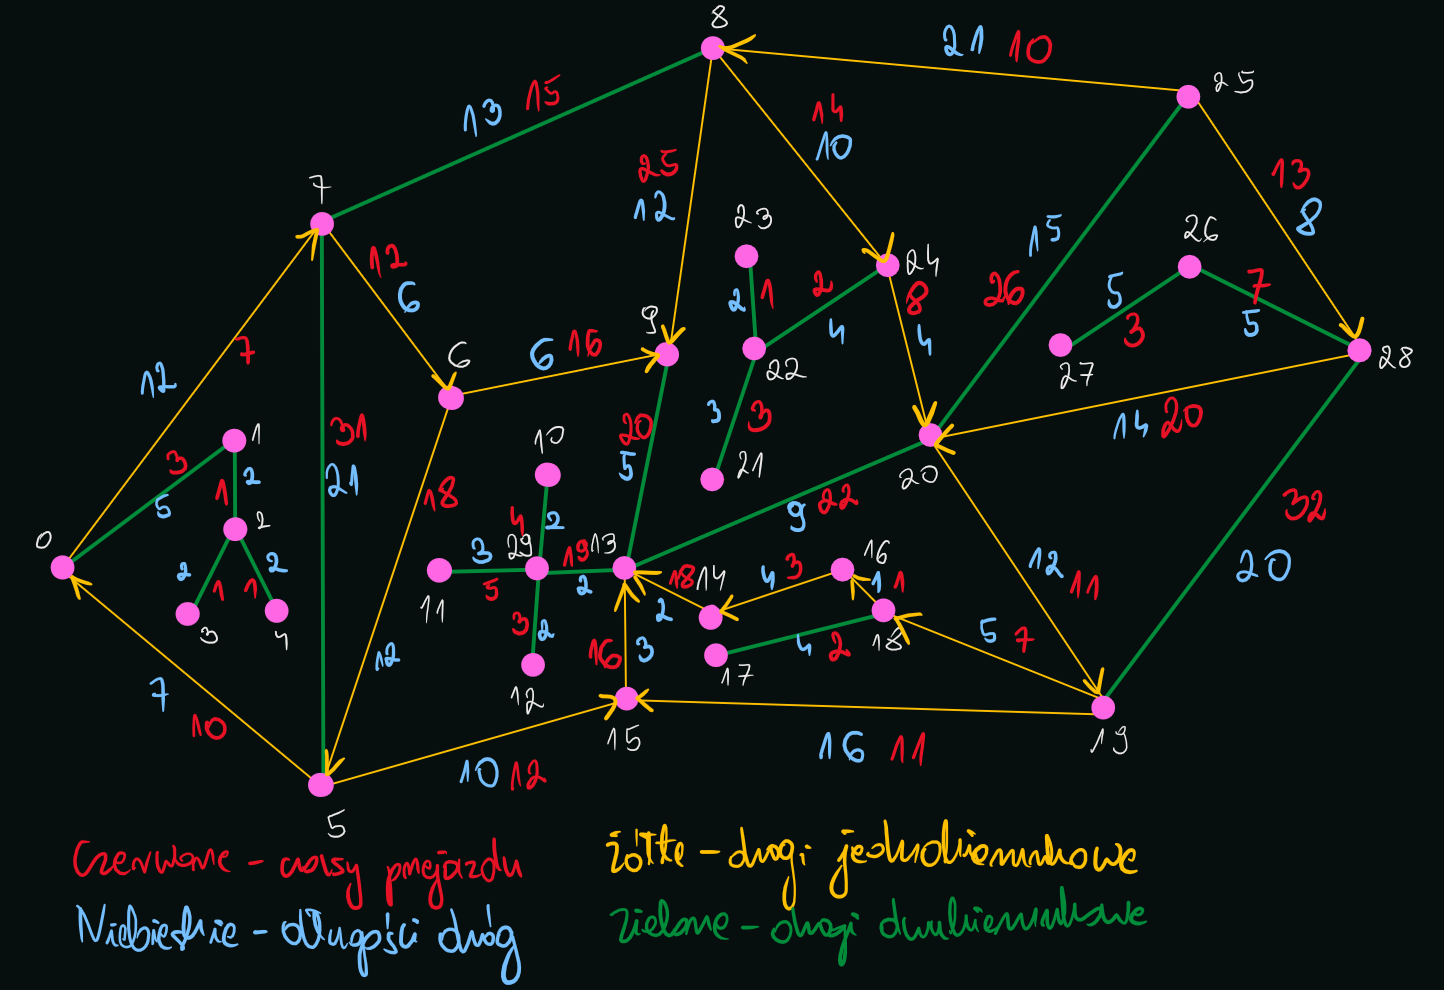

In [6]:
E = [(0, 7, 7, 12), (0, 1, 3, 5), (1, 0, 3, 5), (1, 2, 1, 2), (2, 1, 1, 2), (2, 3, 1, 2), (3, 2, 1, 2),
     (2, 4, 1, 2), (4, 2, 1, 2), (5, 0, 10, 7), (5, 7, 31, 21), (5, 15, 12, 10), (6, 9, 16, 6), (6, 5, 18, 12),
     (7, 5, 31, 21), (7, 6, 12, 6), (7, 8, 15, 13), (8, 7, 13, 15), (8, 9, 25, 12), (8, 24, 14, 10),
     (9, 13, 20, 5), (10, 29, 4, 2), (11, 29, 5, 3), (12, 29, 3, 2), (13, 29, 19, 2), (13, 9, 20, 5), 
     (13, 20, 22, 9), (14, 13, 18, 2), (15, 13, 16, 3), (16, 14, 3, 4), (17, 18, 2, 4), (18, 17, 2, 4), 
     (18, 16, 1, 1), (19, 28, 32, 20), (19, 18, 7, 5), (19, 15, 11, 16), (20, 19, 11, 12), (20, 13, 22, 9),
     (20, 25, 26, 15), (21, 22, 3, 3), (22, 21, 3, 3), (22, 23, 1, 2), (22, 24, 2, 4), (23, 22, 1, 2), 
     (24, 22, 2, 4), (24, 20, 8, 4), (25, 20, 26, 15), (25, 28, 13, 8), (25, 8, 10, 21), (26, 27, 3, 5), 
     (26, 28, 7, 5), (27, 26, 3, 5), (28, 26, 7, 5), (28, 20, 20, 14), (28, 19, 32, 20), (29, 10, 4, 2), 
     (29, 11, 5, 3), (29, 12, 3, 2), (29, 13, 19, 2)]

G = create_city_graph(E)

print(*enumerate(G), sep='\n')

(0, [(7, 7, 12), (1, 3, 5)])
(1, [(0, 3, 5), (2, 1, 2)])
(2, [(1, 1, 2), (3, 1, 2), (4, 1, 2)])
(3, [(2, 1, 2)])
(4, [(2, 1, 2)])
(5, [(0, 10, 7), (7, 31, 21), (15, 12, 10)])
(6, [(9, 16, 6), (5, 18, 12)])
(7, [(5, 31, 21), (6, 12, 6), (8, 15, 13)])
(8, [(7, 13, 15), (9, 25, 12), (24, 14, 10)])
(9, [(13, 20, 5)])
(10, [(29, 4, 2)])
(11, [(29, 5, 3)])
(12, [(29, 3, 2)])
(13, [(29, 19, 2), (9, 20, 5), (20, 22, 9)])
(14, [(13, 18, 2)])
(15, [(13, 16, 3)])
(16, [(14, 3, 4)])
(17, [(18, 2, 4)])
(18, [(17, 2, 4), (16, 1, 1)])
(19, [(28, 32, 20), (18, 7, 5), (15, 11, 16)])
(20, [(19, 11, 12), (13, 22, 9), (25, 26, 15)])
(21, [(22, 3, 3)])
(22, [(21, 3, 3), (23, 1, 2), (24, 2, 4)])
(23, [(22, 1, 2)])
(24, [(22, 2, 4), (20, 8, 4)])
(25, [(20, 26, 15), (28, 13, 8), (8, 10, 21)])
(26, [(27, 3, 5), (28, 7, 5)])
(27, [(26, 3, 5)])
(28, [(26, 7, 5), (20, 20, 14), (19, 32, 20)])
(29, [(10, 4, 2), (11, 5, 3), (12, 3, 2), (13, 19, 2)])


In [7]:
print(shortest_route(G, 0, 28))

(83, 62, [0, 7, 8, 24, 20, 25, 28])


In [8]:
print(shortest_route(G, 0, 11))

(79, 34, [0, 7, 6, 9, 13, 29, 11])


In [9]:
print(shortest_route(G, 17, 11))

(48, 16, [17, 18, 16, 14, 13, 29, 11])


In [10]:
print(shortest_route(G, 27, 3))  # Objazd korków w centrum

(124, 109, [27, 26, 28, 20, 25, 8, 7, 6, 5, 0, 1, 2, 3])


# Dijkstra na macierzy bez spamiętywania
### (Dla $ Q = O(1) $, $ Q = O(V) $ oraz $ E = O(V^2) $)

### Implementacja #1
##### (Tylko znajdowanie czasu i dystansu - jak w poleceniu) 

In [11]:
class Node:
    def __init__(self, idx=None):
        self.idx  = idx
        self.next = None


def vertices_to_process_ll(n):
    head = Node()
    tail = head
    for i in range(n):
        tail.next = Node(i)
        tail = tail.next
    return head


def get_next_vertex(head, times, distances):
    if not head.next: return None  # If no more vertices are remaining
    
    # Find a vertex of the lowest weight
    min_prev = head
    prev = head.next
    while prev.next:
        # Find a vertex of the lowest time path. If there is more than
        # one vetrex with the same minimum time, pick the one of a shorter
        # distance path
        if times[prev.next.idx] < times[min_prev.next.idx] or \
           (times[prev.next.idx] == times[min_prev.next.idx] and \
            distances[prev.next.idx] < distances[min_prev.next.idx]):
            min_prev = prev
        prev = prev.next
        
    # Remove a vertex found
    u = min_prev.next.idx
    min_prev.next = min_prev.next.next
    
    return u


def dijkstra(G: 'graph represented by adjacency matrix', s: 'source', t: 'target'):
    n = len(G)
    inf = float('inf')
    # Store information about vertices which haven't been processed yet
    to_process = vertices_to_process_ll(n)
    times      = [inf] * n
    distances  = [inf] * n
    times[s] = distances[s] = 0
    
    # Loop till there are some vertices which haven't been processed yet
    while True:
        # Find a vertex of the minimum total weight path
        u = get_next_vertex(to_process, times, distances)
        # Break if the next vertex to process is the target vertex as we have 
        # already found a shortest path to this vertex before
        if u == t: break
        # Iterate over the vertice's neighbours and update weights of the paths
        for v in range(n):
            # Skip if no edge
            if not G[u][v]: continue
            # Update the weight of a path to the vertex v if found a better one
            v_time = times[u] + G[u][v][0]
            v_dist = distances[u] + G[u][v][1]
            if v_time < times[v] or (v_time == times[v] and v_dist < distances[v]):
                times[v] = v_time
                distances[v] = v_dist
                
    return times, distances


def shortest_route_dist(G: 'graph of a city with times and distances', s: 'start crossing', t: 'end crossing'):
    times, distances = dijkstra(G, s, t)
    # If a crossing is impossible to reach
    if times[t] == float('inf'):
        return (-1,) * 2
    return times[t], distances[t]

###### Kilka testów

##### Pomocnicze:

In [12]:
def create_city_graph(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[None] * n for _ in range(n)]
    for e in E:
        G[e[0]][e[1]] = e[2], e[3]
    return G

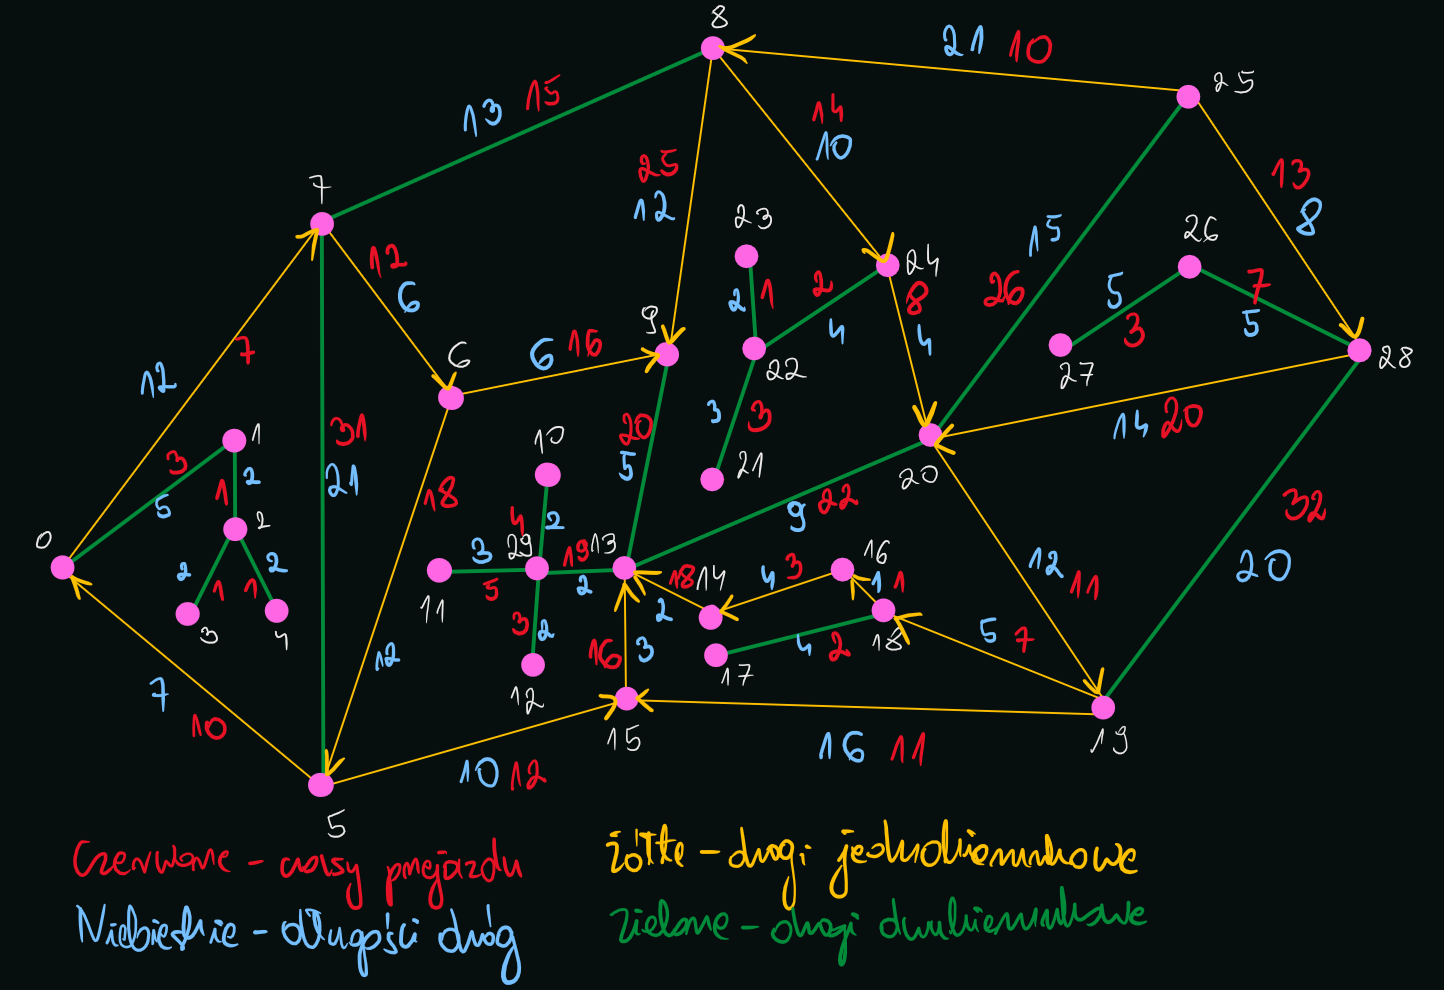

In [13]:
E = [(0, 7, 7, 12), (0, 1, 3, 5), (1, 0, 3, 5), (1, 2, 1, 2), (2, 1, 1, 2), (2, 3, 1, 2), (3, 2, 1, 2),
     (2, 4, 1, 2), (4, 2, 1, 2), (5, 0, 10, 7), (5, 7, 31, 21), (5, 15, 12, 10), (6, 9, 16, 6), (6, 5, 18, 12),
     (7, 5, 31, 21), (7, 6, 12, 6), (7, 8, 15, 13), (8, 7, 13, 15), (8, 9, 25, 12), (8, 24, 14, 10),
     (9, 13, 20, 5), (10, 29, 4, 2), (11, 29, 5, 3), (12, 29, 3, 2), (13, 29, 19, 2), (13, 9, 20, 5), 
     (13, 20, 22, 9), (14, 13, 18, 2), (15, 13, 16, 3), (16, 14, 3, 4), (17, 18, 2, 4), (18, 17, 2, 4), 
     (18, 16, 1, 1), (19, 28, 32, 20), (19, 18, 7, 5), (19, 15, 11, 16), (20, 19, 11, 12), (20, 13, 22, 9),
     (20, 25, 26, 15), (21, 22, 3, 3), (22, 21, 3, 3), (22, 23, 1, 2), (22, 24, 2, 4), (23, 22, 1, 2), 
     (24, 22, 2, 4), (24, 20, 8, 4), (25, 20, 26, 15), (25, 28, 13, 8), (25, 8, 10, 21), (26, 27, 3, 5), 
     (26, 28, 7, 5), (27, 26, 3, 5), (28, 26, 7, 5), (28, 20, 20, 14), (28, 19, 32, 20), (29, 10, 4, 2), 
     (29, 11, 5, 3), (29, 12, 3, 2), (29, 13, 19, 2)]

G = create_city_graph(E)

s = 0
t = 28

print(shortest_route_dist(G, s, t))

(83, 62)


### Implementacja #2
##### (Z odtwarzaniem znalezionej trasy) 

In [14]:
class Node:
    def __init__(self, idx=None):
        self.idx  = idx
        self.next = None


def vertices_to_process_ll(n):
    head = Node()
    tail = head
    for i in range(n):
        tail.next = Node(i)
        tail = tail.next
    return head


def get_next_vertex(head, times, distances):
    if not head.next: return None  # If no more vertices are remaining
    
    # Find a vertex of the lowest weight
    min_prev = head
    prev = head.next
    while prev.next:
        # Find a vertex of the lowest time path. If there is more than
        # one vetrex with the same minimum time, pick the one of a shorter
        # distance path
        if times[prev.next.idx] < times[min_prev.next.idx] or \
           (times[prev.next.idx] == times[min_prev.next.idx] and \
            distances[prev.next.idx] < distances[min_prev.next.idx]):
            min_prev = prev
        prev = prev.next
        
    # Remove a vertex found
    u = min_prev.next.idx
    min_prev.next = min_prev.next.next
    
    return u


def dijkstra(G: 'graph represented by adjacency matrix', s: 'source', t: 'target'):
    n = len(G)
    inf = float('inf')
    # Store information about vertices which haven't been processed yet
    to_process = vertices_to_process_ll(n)
    times      = [inf] * n
    distances  = [inf] * n
    parents    = [None] * n
    times[s] = distances[s] = 0
    
    # Loop till there are some vertices which haven't been processed yet
    while True:
        # Find a vertex of the minimum total weight path
        u = get_next_vertex(to_process, times, distances)
        # Break if the next vertex to process is the target vertex as we have 
        # already found a shortest path to this vertex before
        if u == t: break
        # Iterate over the vertice's neighbours and update weights of the paths
        for v in range(n):
            # Skip if no edge
            if not G[u][v]: continue
            # Update the weight of a path to the vertex v if found a better one
            v_time = times[u] + G[u][v][0]
            v_dist = distances[u] + G[u][v][1]
            if v_time < times[v] or (v_time == times[v] and v_dist < distances[v]):
                times[v] = v_time
                parents[v] = u
                distances[v] = v_dist
                
    return times, distances, parents


def get_path(parents, t):
    path = []
    
    while t is not None:
        path.append(t)
        t = parents[t]
        
    path.reverse()
    return path


def shortest_route(G: 'graph of a city with times and distances', s: 'start crossing', t: 'end crossing'):
    times, distances, parents = dijkstra(G, s, t)
    # If a crossing is impossible to reach
    if times[t] == float('inf'):
        return (-1, -1, [])
    return times[t], distances[t], get_path(parents, t)

###### Kilka testów

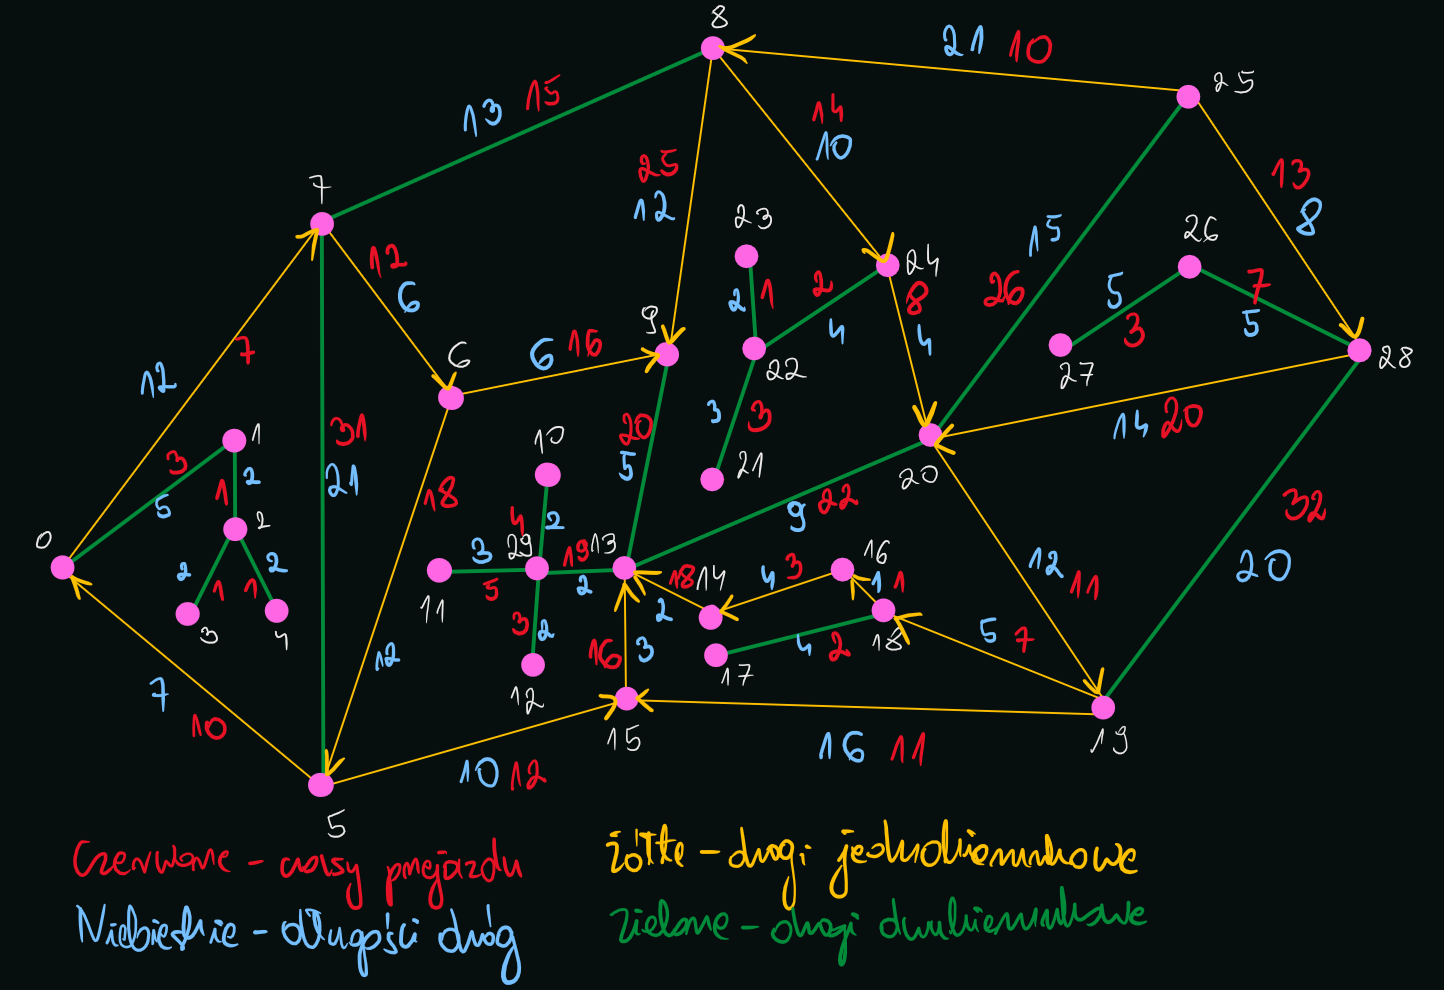

In [15]:
E = [(0, 7, 7, 12), (0, 1, 3, 5), (1, 0, 3, 5), (1, 2, 1, 2), (2, 1, 1, 2), (2, 3, 1, 2), (3, 2, 1, 2),
     (2, 4, 1, 2), (4, 2, 1, 2), (5, 0, 10, 7), (5, 7, 31, 21), (5, 15, 12, 10), (6, 9, 16, 6), (6, 5, 18, 12),
     (7, 5, 31, 21), (7, 6, 12, 6), (7, 8, 15, 13), (8, 7, 13, 15), (8, 9, 25, 12), (8, 24, 14, 10),
     (9, 13, 20, 5), (10, 29, 4, 2), (11, 29, 5, 3), (12, 29, 3, 2), (13, 29, 19, 2), (13, 9, 20, 5), 
     (13, 20, 22, 9), (14, 13, 18, 2), (15, 13, 16, 3), (16, 14, 3, 4), (17, 18, 2, 4), (18, 17, 2, 4), 
     (18, 16, 1, 1), (19, 28, 32, 20), (19, 18, 7, 5), (19, 15, 11, 16), (20, 19, 11, 12), (20, 13, 22, 9),
     (20, 25, 26, 15), (21, 22, 3, 3), (22, 21, 3, 3), (22, 23, 1, 2), (22, 24, 2, 4), (23, 22, 1, 2), 
     (24, 22, 2, 4), (24, 20, 8, 4), (25, 20, 26, 15), (25, 28, 13, 8), (25, 8, 10, 21), (26, 27, 3, 5), 
     (26, 28, 7, 5), (27, 26, 3, 5), (28, 26, 7, 5), (28, 20, 20, 14), (28, 19, 32, 20), (29, 10, 4, 2), 
     (29, 11, 5, 3), (29, 12, 3, 2), (29, 13, 19, 2)]

G = create_city_graph(E)

In [16]:
print(shortest_route(G, 0, 28))

(83, 62, [0, 7, 8, 24, 20, 25, 28])


In [17]:
print(shortest_route(G, 0, 11))

(79, 34, [0, 7, 6, 9, 13, 29, 11])


In [18]:
print(shortest_route(G, 17, 11))

(48, 16, [17, 18, 16, 14, 13, 29, 11])


In [19]:
print(shortest_route(G, 27, 3))  # Objazd korków w centrum

(124, 109, [27, 26, 28, 20, 25, 8, 7, 6, 5, 0, 1, 2, 3])


# Dijkstra na listach ze spamiętywaniem
### (Dla $ Q = Ω(V) $ oraz $ E = O(V) $)

### Implementacja #1
##### (Od razu z odtwarzaniem znalezionej trasy - ale zapamiętujemy tylko rodziców) 

In [20]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', s: 'source', t: 'target',
             times, distances, parents):
    n = len(G)
    inf = float('inf')
    # Assign pointers to appropriate rows of input 2D matrices
    # (We can then use them as 1D arrays and make no more modifications
    # in the Dijkstra's algorithm)
    times     = times[s]
    distances = distances[s]
    parents   = parents[s]
    pq = PriorityQueue()
    pq.put((0, 0, s, None))

    while not pq.empty():
        min_time, curr_dist, u, v = pq.get()
        # Because all elements in a priority are sorted by min_time first and
        # then by dist in a non-decreasing order, we will always get a path of
        # the lowest time first and if there is more than one path of the lowest
        # time, we will get a path of the lowest distance among these paths
        if min_time < times[u]:  # We can check only this condition (see a comment above)
            times[u] = min_time
            parents[u] = v
            distances[u] = curr_dist
            # Break a loop if we found a shortest path to the specified target
            if u == t: break
            # Add all the neighbours of the u vertex to the priority queue (to which
            # we haven't found the shortest path yet)
            for v, time, dist in G[u]:
                if times[v] == inf:
                    pq.put((min_time + time, curr_dist + dist, v, u))


def get_path(parents, t):
    path = []
    
    while t is not None:
        path.append(t)
        t = parents[t]
        
    path.reverse()
    return path


def shortest_route_init(G: 'graph of a city with times and distances'):
    n = len(G)
    inf = float('inf')
    processed = [False] * n
    times     = [[inf] * n for _ in range(n)]
    distances = [[inf] * n for _ in range(n)]
    parents   = [[None] * n for _ in range(n)]
    
    def shortest_route(s: 'start crossing', t: 'end crossing'):
        # Check if we have already found all the best paths from the 's' vertex
        if not processed[s]:
            processed[s] = True
            dijkstra(G, s, t, times, distances, parents)
        # If we can reach the target, get a path and return a time, distance
        # and a path
        return (times[s][t], distances[s][t], get_path(parents[s], t)) if times[s][t] < inf else (-1, -1, [])
    
    return shortest_route

###### Kilka testów

##### Pomocnicze:

In [21]:
def create_city_graph(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append(e[1:])
    return G

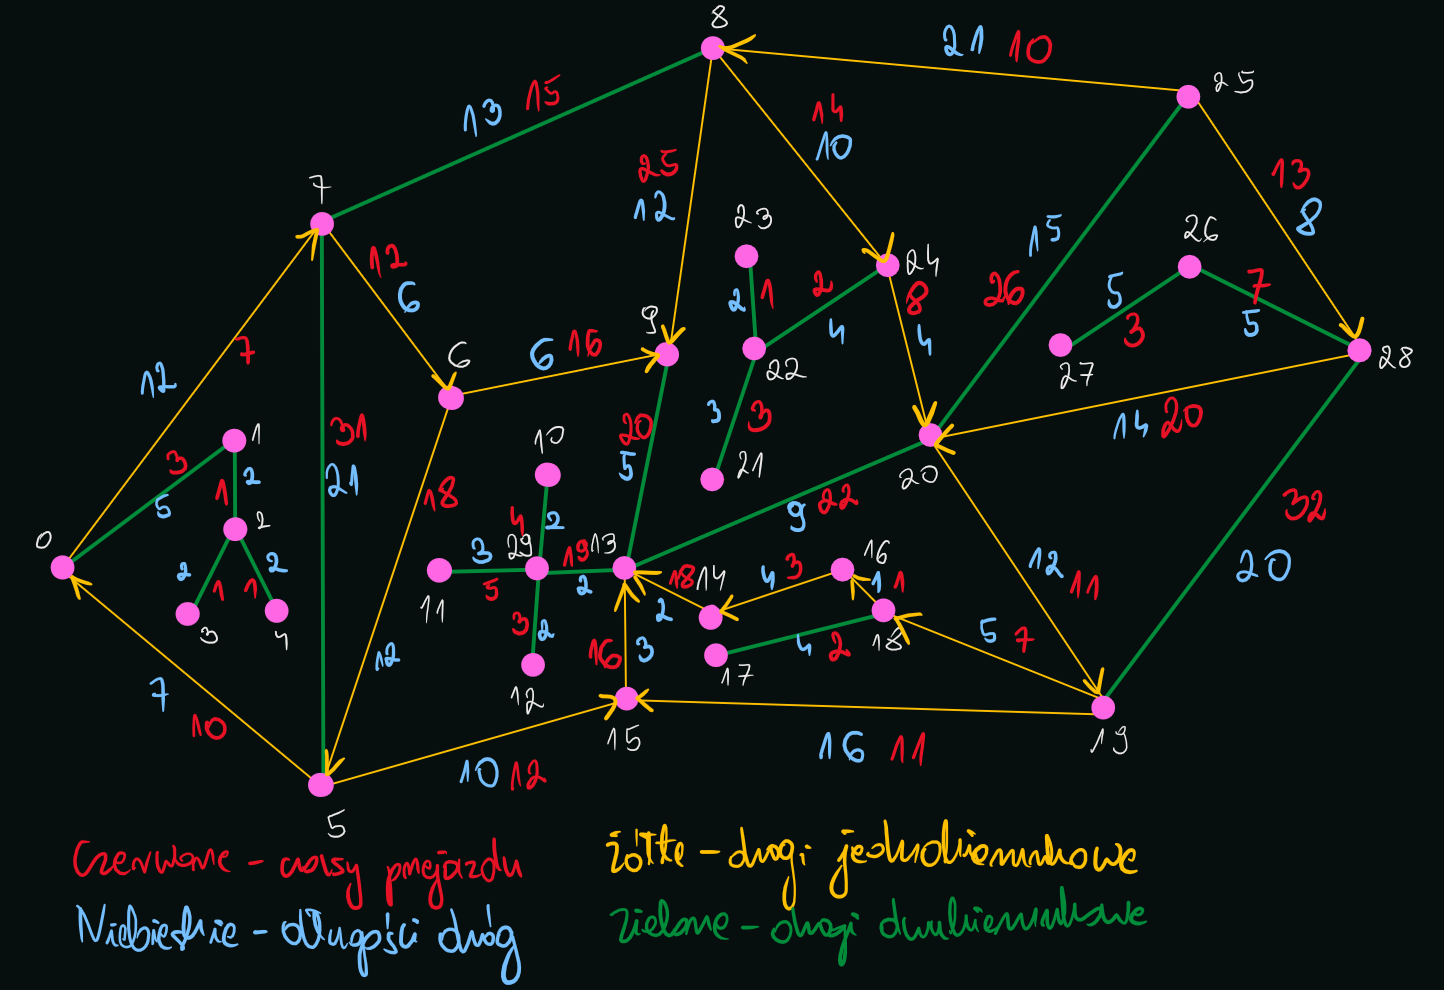

In [22]:
E = [(0, 7, 7, 12), (0, 1, 3, 5), (1, 0, 3, 5), (1, 2, 1, 2), (2, 1, 1, 2), (2, 3, 1, 2), (3, 2, 1, 2),
     (2, 4, 1, 2), (4, 2, 1, 2), (5, 0, 10, 7), (5, 7, 31, 21), (5, 15, 12, 10), (6, 9, 16, 6), (6, 5, 18, 12),
     (7, 5, 31, 21), (7, 6, 12, 6), (7, 8, 15, 13), (8, 7, 13, 15), (8, 9, 25, 12), (8, 24, 14, 10),
     (9, 13, 20, 5), (10, 29, 4, 2), (11, 29, 5, 3), (12, 29, 3, 2), (13, 29, 19, 2), (13, 9, 20, 5), 
     (13, 20, 22, 9), (14, 13, 18, 2), (15, 13, 16, 3), (16, 14, 3, 4), (17, 18, 2, 4), (18, 17, 2, 4), 
     (18, 16, 1, 1), (19, 28, 32, 20), (19, 18, 7, 5), (19, 15, 11, 16), (20, 19, 11, 12), (20, 13, 22, 9),
     (20, 25, 26, 15), (21, 22, 3, 3), (22, 21, 3, 3), (22, 23, 1, 2), (22, 24, 2, 4), (23, 22, 1, 2), 
     (24, 22, 2, 4), (24, 20, 8, 4), (25, 20, 26, 15), (25, 28, 13, 8), (25, 8, 10, 21), (26, 27, 3, 5), 
     (26, 28, 7, 5), (27, 26, 3, 5), (28, 26, 7, 5), (28, 20, 20, 14), (28, 19, 32, 20), (29, 10, 4, 2), 
     (29, 11, 5, 3), (29, 12, 3, 2), (29, 13, 19, 2)]

G = create_city_graph(E)
shortest_route = shortest_route_init(G)

In [23]:
print(shortest_route(0, 28))

(83, 62, [0, 7, 8, 24, 20, 25, 28])


In [24]:
print(shortest_route(0, 11)) # Teraz jest tylko odtwarzana ścieżka

(79, 34, [0, 7, 6, 9, 13, 29, 11])


In [25]:
print(shortest_route(17, 11))

(48, 16, [17, 18, 16, 14, 13, 29, 11])


In [26]:
print(shortest_route(27, 3))  # Objazd korków w centrum

(124, 109, [27, 26, 28, 20, 25, 8, 7, 6, 5, 0, 1, 2, 3])


### Implementacja #2
##### (Z odtwarzaniem wyznaczonej trasy i jej zapamiętywaniem w calości) 

In [27]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', s: 'source', t: 'target',
             times, distances, parents):
    n = len(G)
    inf = float('inf')
    # Assign pointers to appropriate rows of input 2D matrices
    # (We can then use them as 1D arrays and make no more modifications
    # in the Dijkstra's algorithm)
    times     = times[s]
    distances = distances[s]
    parents   = parents[s]
    pq = PriorityQueue()
    pq.put((0, 0, s, None))

    while not pq.empty():
        min_time, curr_dist, u, v = pq.get()
        # Because all elements in a priority are sorted by min_time first and
        # then by dist in a non-decreasing order, we will always get a path of
        # the lowest time first and if there is more than one path of the lowest
        # time, we will get a path of the lowest distance among these paths
        if min_time < times[u]:  # We can check only this condition (see a comment above)
            times[u] = min_time
            parents[u] = v
            distances[u] = curr_dist
            # Break a loop if we found a shortest path to the specified target
            if u == t: break
            # Add all the neighbours of the u vertex to the priority queue (to which
            # we haven't found the shortest path yet)
            for v, time, dist in G[u]:
                if times[v] == inf:
                    pq.put((min_time + time, curr_dist + dist, v, u))

def get_path(parents, t):
    path = []
    
    while t is not None:
        path.append(t)
        t = parents[t]
        
    path.reverse()
    return path


def shortest_route_init(G: 'graph of a city with times and distances'):
    n = len(G)
    inf = float('inf')
    processed = [False] * n
    times     = [[inf] * n for _ in range(n)]
    distances = [[inf] * n for _ in range(n)]
    parents   = [[None] * n for _ in range(n)]
    paths     = [[[] for _ in range(n)] for _ in range(n)]
    
    def shortest_route(s: 'start crossing', t: 'end crossing'):
        # Check if we have already found all the best paths from the 's' vertex
        if not processed[s]:
            processed[s] = True
            dijkstra(G, s, t, times, distances, parents)
            
        # Create a path from 's' to 't' if haven't created yet
        if not paths[s][t]:
            path = get_path(parents[s], t)
            paths[s][t] = path
            
        # If we can reach the target, get a path and return a time, distance
        # and a path
        return (times[s][t], distances[s][t], paths[s][t]) if times[s][t] < inf else (-1, -1, [])
    
    return shortest_route

###### Kilka testów

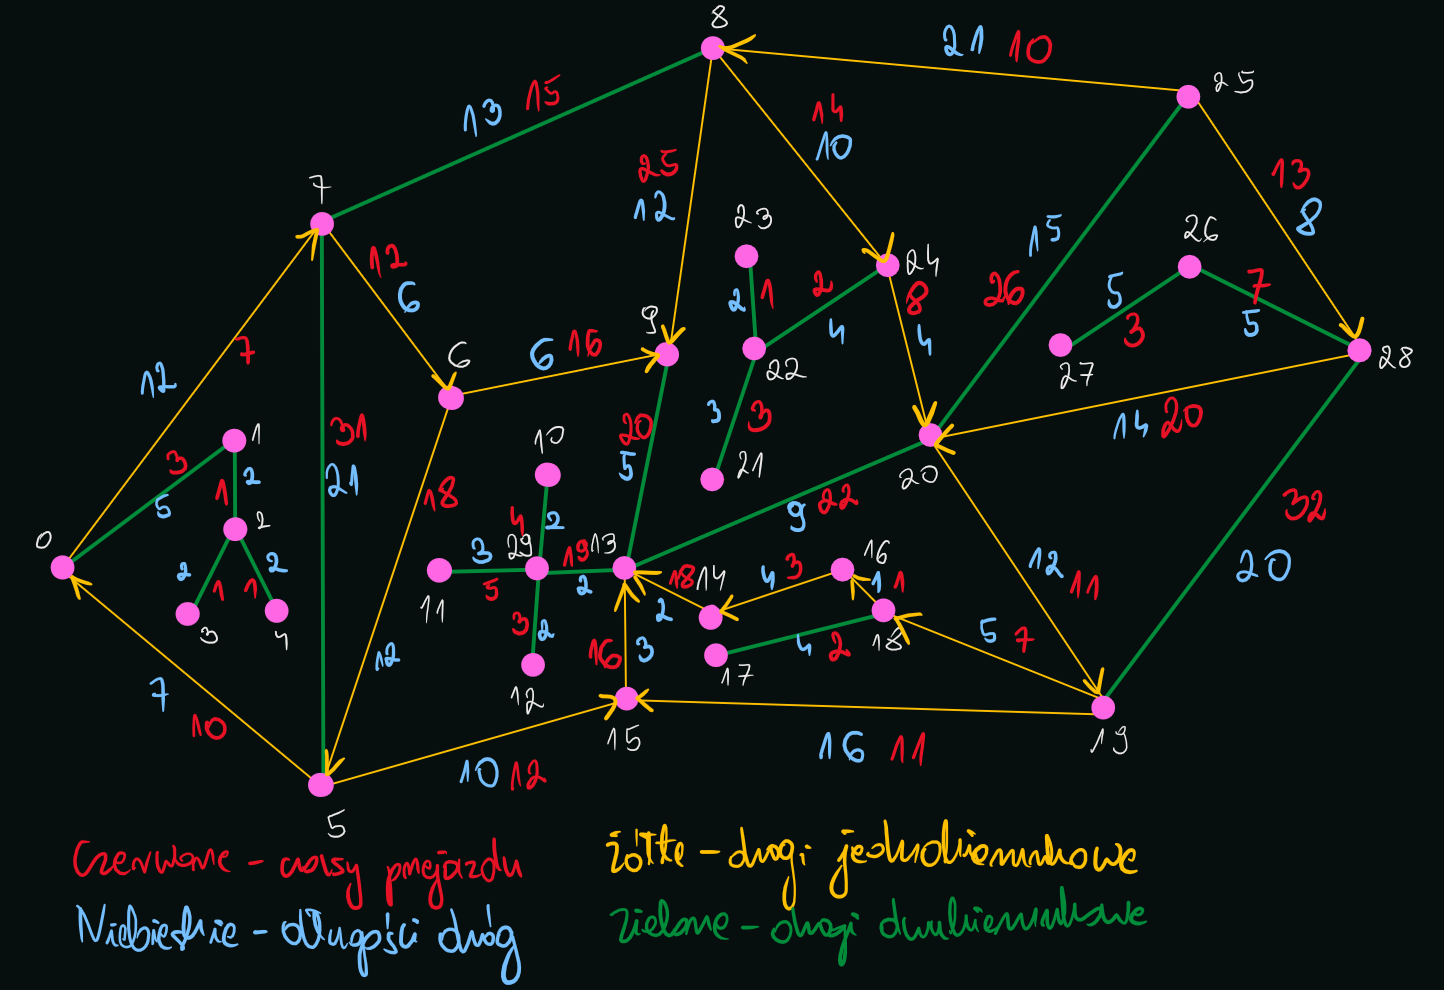

In [28]:
E = [(0, 7, 7, 12), (0, 1, 3, 5), (1, 0, 3, 5), (1, 2, 1, 2), (2, 1, 1, 2), (2, 3, 1, 2), (3, 2, 1, 2),
     (2, 4, 1, 2), (4, 2, 1, 2), (5, 0, 10, 7), (5, 7, 31, 21), (5, 15, 12, 10), (6, 9, 16, 6), (6, 5, 18, 12),
     (7, 5, 31, 21), (7, 6, 12, 6), (7, 8, 15, 13), (8, 7, 13, 15), (8, 9, 25, 12), (8, 24, 14, 10),
     (9, 13, 20, 5), (10, 29, 4, 2), (11, 29, 5, 3), (12, 29, 3, 2), (13, 29, 19, 2), (13, 9, 20, 5), 
     (13, 20, 22, 9), (14, 13, 18, 2), (15, 13, 16, 3), (16, 14, 3, 4), (17, 18, 2, 4), (18, 17, 2, 4), 
     (18, 16, 1, 1), (19, 28, 32, 20), (19, 18, 7, 5), (19, 15, 11, 16), (20, 19, 11, 12), (20, 13, 22, 9),
     (20, 25, 26, 15), (21, 22, 3, 3), (22, 21, 3, 3), (22, 23, 1, 2), (22, 24, 2, 4), (23, 22, 1, 2), 
     (24, 22, 2, 4), (24, 20, 8, 4), (25, 20, 26, 15), (25, 28, 13, 8), (25, 8, 10, 21), (26, 27, 3, 5), 
     (26, 28, 7, 5), (27, 26, 3, 5), (28, 26, 7, 5), (28, 20, 20, 14), (28, 19, 32, 20), (29, 10, 4, 2), 
     (29, 11, 5, 3), (29, 12, 3, 2), (29, 13, 19, 2)]

G = create_city_graph(E)
shortest_route = shortest_route_init(G)

In [29]:
print(shortest_route(0, 28))

(83, 62, [0, 7, 8, 24, 20, 25, 28])


In [30]:
print(shortest_route(0, 11)) # Teraz jest tylko odtwarzana ścieżka

(79, 34, [0, 7, 6, 9, 13, 29, 11])


In [31]:
print(shortest_route(17, 11))

(48, 16, [17, 18, 16, 14, 13, 29, 11])


In [32]:
print(shortest_route(27, 3))  # Objazd korków w centrum

(124, 109, [27, 26, 28, 20, 25, 8, 7, 6, 5, 0, 1, 2, 3])


# Dijkstra na macierzy ze spamiętywaniem
### (Dla $ Q = Ω(V) $ oraz $ E = O(V^2) $, ale i tak teraz to już lepiej użyć Floyda-Warshalla)

### Implementacja #1
##### (Z odtwarzaniem trasy na bieżąco i spamiętywaniem rodziców (oraz czasów i odległości))

In [33]:
class Node:
    def __init__(self, idx=None):
        self.idx  = idx
        self.next = None


def vertices_to_process_ll(n):
    head = Node()
    tail = head
    for i in range(n):
        tail.next = Node(i)
        tail = tail.next
    return head


def get_next_vertex(head, times, distances):
    if not head.next: return None  # If no more vertices are remaining
    
    # Find a vertex of the lowest weight
    min_prev = head
    prev = head.next
    while prev.next:
        # Find a vertex of the lowest time path. If there is more than
        # one vetrex with the same minimum time, pick the one of a shorter
        # distance path
        if times[prev.next.idx] < times[min_prev.next.idx] or \
           (times[prev.next.idx] == times[min_prev.next.idx] and \
            distances[prev.next.idx] < distances[min_prev.next.idx]):
            min_prev = prev
        prev = prev.next
        
    # Remove a vertex found
    u = min_prev.next.idx
    min_prev.next = min_prev.next.next
    
    return u


def dijkstra(G: 'graph represented by adjacency matrix', s: 'source', t: 'target',
             times, distances, parents):
    n = len(G)
    inf = float('inf')
    # Store information about vertices which haven't been processed yet
    to_process = vertices_to_process_ll(n)
    times = times[s]
    parents = parents[s]
    distances = distances[s]
    times[s] = distances[s] = 0
    
    # Loop till there are some vertices which haven't been processed yet
    while True:
        # Find a vertex of the minimum total weight path
        u = get_next_vertex(to_process, times, distances)
        # Break if the next vertex to process is the target vertex as we have 
        # already found a shortest path to this vertex before
        if u == t: break
        # Iterate over the vertice's neighbours and update weights of the paths
        for v in range(n):
            # Skip if no edge
            if not G[u][v]: continue
            # Update the weight of a path to the vertex v if found a better one
            v_time = times[u] + G[u][v][0]
            v_dist = distances[u] + G[u][v][1]
            if v_time < times[v] or (v_time == times[v] and v_dist < distances[v]):
                times[v] = v_time
                parents[v] = u
                distances[v] = v_dist
                
    return times, distances, parents


def get_path(parents, t):
    path = []
    
    while t is not None:
        path.append(t)
        t = parents[t]
        
    path.reverse()
    return path


def shortest_route_init(G: 'graph of a city with times and distances'):
    n = len(G)
    inf = float('inf')
    processed = [False] * n
    times     = [[inf] * n for _ in range(n)]
    distances = [[inf] * n for _ in range(n)]
    parents   = [[None] * n for _ in range(n)]
    
    def shortest_route(s: 'start crossing', t: 'end crossing'):
        # Check if we have already found all the best paths from the 's' vertex
        if not processed[s]:
            processed[s] = True
            dijkstra(G, s, t, times, distances, parents)
        # If we can reach the target, get a path and return a time, distance
        # and a path
        return (times[s][t], distances[s][t], get_path(parents[s], t)) if times[s][t] < inf else (-1, -1, [])
    
    return shortest_route

###### Kilka testów

##### Pomocnicze:

In [34]:
def create_city_graph(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[None] * n for _ in range(n)]
    for e in E:
        G[e[0]][e[1]] = e[2], e[3]
    return G

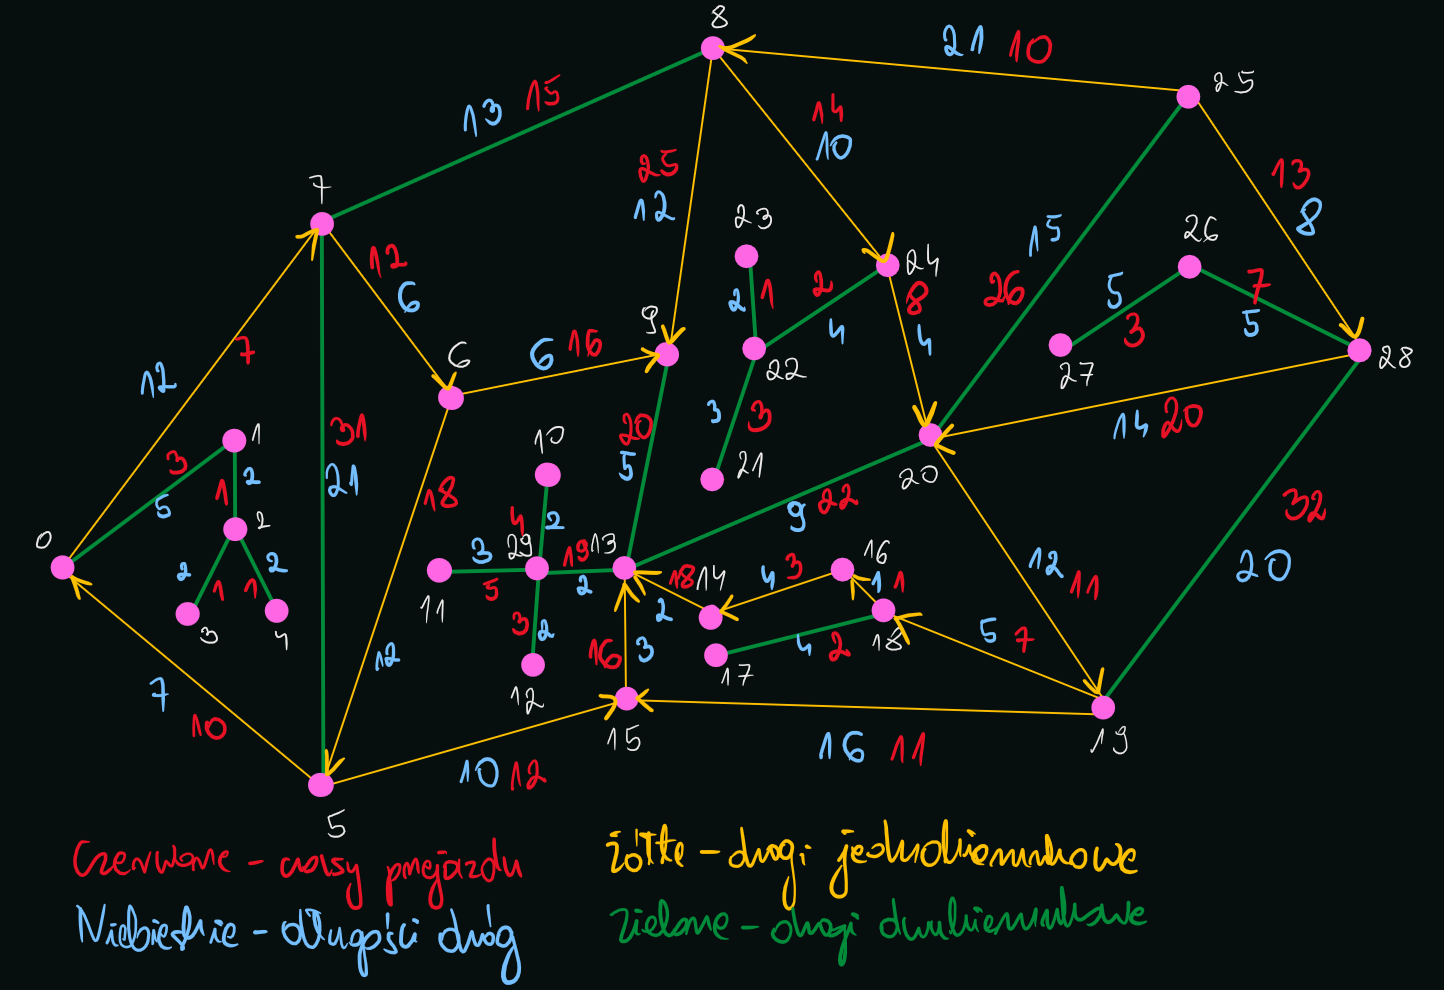

In [35]:
E = [(0, 7, 7, 12), (0, 1, 3, 5), (1, 0, 3, 5), (1, 2, 1, 2), (2, 1, 1, 2), (2, 3, 1, 2), (3, 2, 1, 2),
     (2, 4, 1, 2), (4, 2, 1, 2), (5, 0, 10, 7), (5, 7, 31, 21), (5, 15, 12, 10), (6, 9, 16, 6), (6, 5, 18, 12),
     (7, 5, 31, 21), (7, 6, 12, 6), (7, 8, 15, 13), (8, 7, 13, 15), (8, 9, 25, 12), (8, 24, 14, 10),
     (9, 13, 20, 5), (10, 29, 4, 2), (11, 29, 5, 3), (12, 29, 3, 2), (13, 29, 19, 2), (13, 9, 20, 5), 
     (13, 20, 22, 9), (14, 13, 18, 2), (15, 13, 16, 3), (16, 14, 3, 4), (17, 18, 2, 4), (18, 17, 2, 4), 
     (18, 16, 1, 1), (19, 28, 32, 20), (19, 18, 7, 5), (19, 15, 11, 16), (20, 19, 11, 12), (20, 13, 22, 9),
     (20, 25, 26, 15), (21, 22, 3, 3), (22, 21, 3, 3), (22, 23, 1, 2), (22, 24, 2, 4), (23, 22, 1, 2), 
     (24, 22, 2, 4), (24, 20, 8, 4), (25, 20, 26, 15), (25, 28, 13, 8), (25, 8, 10, 21), (26, 27, 3, 5), 
     (26, 28, 7, 5), (27, 26, 3, 5), (28, 26, 7, 5), (28, 20, 20, 14), (28, 19, 32, 20), (29, 10, 4, 2), 
     (29, 11, 5, 3), (29, 12, 3, 2), (29, 13, 19, 2)]

G = create_city_graph(E)
shortest_route = shortest_route_init(G)

In [36]:
print(shortest_route(0, 28))

(83, 62, [0, 7, 8, 24, 20, 25, 28])


In [37]:
print(shortest_route(0, 11)) # Teraz jest tylko odtwarzana ścieżka

(79, 34, [0, 7, 6, 9, 13, 29, 11])


In [38]:
print(shortest_route(17, 11))

(48, 16, [17, 18, 16, 14, 13, 29, 11])


In [39]:
print(shortest_route(27, 3))  # Objazd korków w centrum

(124, 109, [27, 26, 28, 20, 25, 8, 7, 6, 5, 0, 1, 2, 3])


### Implementacja #2
##### (Ze spamiętywaniem całych ścieżek)

Modyfikacja taka sama jak dla listowej wersji algorytmu.

# Floyd-Warshall (na macierzy zawsze)
### (Dla $ Q = O(V), E = O(V^2) $)
##### (Tu nawet można ograniczyć $ Q = O(V^3) $ i wciąż będziemy mieli tę samą złożoność $ O(Q + V^3) = O(V^3 + V^3) = O(V^3) $)

### Implementacja #1
##### (Jedynie spamiętywanie czasu i długości - jak w poleceniu)

In [40]:
def floyd_warshall(G: 'graph represented by adjacency matrix'):
    n = len(G)
    inf = float('inf')
    
    times     = [[inf] * n for _ in range(n)]
    distances = [[inf] * n for _ in range(n)]
    
    # Add initial values to matrices above
    for i in range(n):
        for j in range(n):
            if G[i][j]:
                time, dist = G[i][j]
                times[i][j] = time
                distances[i][j] = dist
            elif i == j:
                times[i][j] = distances[i][j] = 0
    
    for t in range(n):
        for i in range(n):
            for j in range(n):
                time = times[i][t] + times[t][j]
                dist = distances[i][t] + distances[t][j]
                if time < times[i][j] or (time == times[i][j] and dist < distances[i][j]):
                    times[i][j] = time
                    distances[i][j] = dist
                
    return times, distances


def shortest_route_dist_init(G: 'graph of a city with times and distances'):
    times, distances = floyd_warshall(G)
    inf = float('inf')
    
    def shortest_route_dist(s: 'start crossing', t: 'end crossing'):
        return (times[s][t], distances[s][t]) if times[s][t] < inf else (-1, -1)
    
    return shortest_route_dist

###### Kilka testów

##### Pomocnicze:

In [41]:
def create_city_graph(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[None] * n for _ in range(n)]
    for e in E:
        G[e[0]][e[1]] = e[2], e[3]
    return G

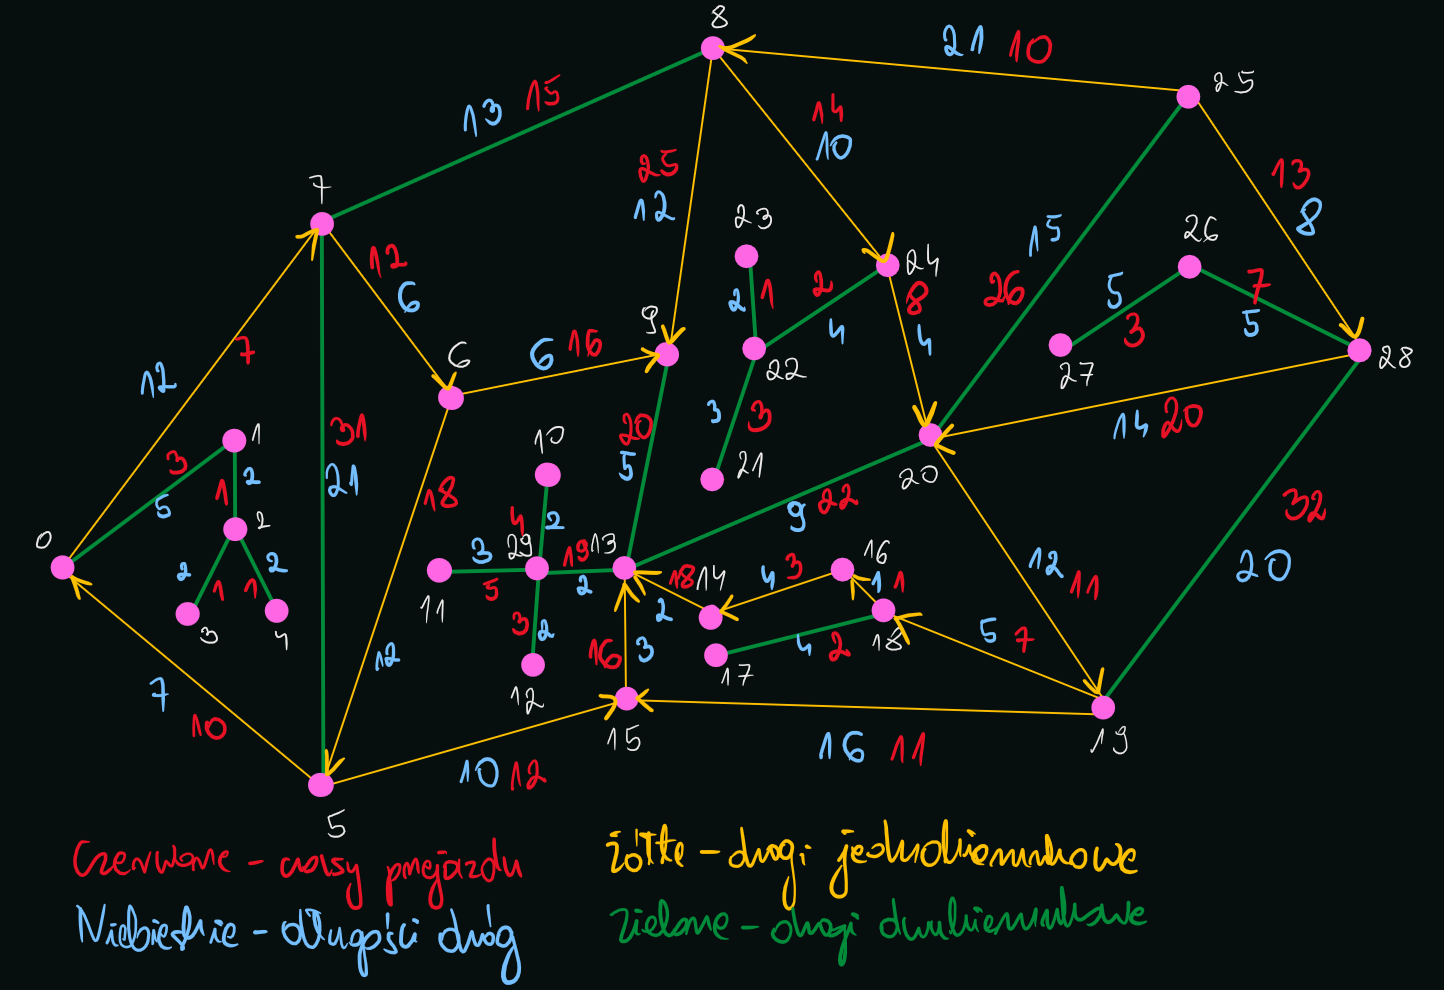

In [42]:
E = [(0, 7, 7, 12), (0, 1, 3, 5), (1, 0, 3, 5), (1, 2, 1, 2), (2, 1, 1, 2), (2, 3, 1, 2), (3, 2, 1, 2),
     (2, 4, 1, 2), (4, 2, 1, 2), (5, 0, 10, 7), (5, 7, 31, 21), (5, 15, 12, 10), (6, 9, 16, 6), (6, 5, 18, 12),
     (7, 5, 31, 21), (7, 6, 12, 6), (7, 8, 15, 13), (8, 7, 13, 15), (8, 9, 25, 12), (8, 24, 14, 10),
     (9, 13, 20, 5), (10, 29, 4, 2), (11, 29, 5, 3), (12, 29, 3, 2), (13, 29, 19, 2), (13, 9, 20, 5), 
     (13, 20, 22, 9), (14, 13, 18, 2), (15, 13, 16, 3), (16, 14, 3, 4), (17, 18, 2, 4), (18, 17, 2, 4), 
     (18, 16, 1, 1), (19, 28, 32, 20), (19, 18, 7, 5), (19, 15, 11, 16), (20, 19, 11, 12), (20, 13, 22, 9),
     (20, 25, 26, 15), (21, 22, 3, 3), (22, 21, 3, 3), (22, 23, 1, 2), (22, 24, 2, 4), (23, 22, 1, 2), 
     (24, 22, 2, 4), (24, 20, 8, 4), (25, 20, 26, 15), (25, 28, 13, 8), (25, 8, 10, 21), (26, 27, 3, 5), 
     (26, 28, 7, 5), (27, 26, 3, 5), (28, 26, 7, 5), (28, 20, 20, 14), (28, 19, 32, 20), (29, 10, 4, 2), 
     (29, 11, 5, 3), (29, 12, 3, 2), (29, 13, 19, 2)]

G = create_city_graph(E)
shortest_route_dist = shortest_route_dist_init(G)

In [43]:
print(shortest_route_dist(0, 28))

(83, 62)


### Implementacja #2
##### (Ze spamiętywaniem rodziców i odtwarzaniem ścieżki na bieżąco)

In [44]:
def floyd_warshall(G: 'graph represented by adjacency matrix'):
    n = len(G)
    inf = float('inf')
    
    times     = [[inf] * n for _ in range(n)]
    distances = [[inf] * n for _ in range(n)]
    parents   = [[None] * n for _ in range(n)]
    
    # Add initial values to matrices above
    for i in range(n):
        for j in range(n):
            if G[i][j]:
                time, dist = G[i][j]
                times[i][j] = time
                distances[i][j] = dist
            elif i == j:
                times[i][j] = distances[i][j] = 0
    
    for t in range(n):
        for i in range(n):
            for j in range(n):
                time = times[i][t] + times[t][j]
                dist = distances[i][t] + distances[t][j]
                if time < times[i][j] or (time == times[i][j] and dist < distances[i][j]):
                    times[i][j] = time
                    parents[i][j] = t
                    distances[i][j] = dist
                
    return times, distances, parents


def get_path(parents, s, t):
    if parents[s][t] is None: return None
    
    path = []
    
    # Recursively restore a path
    def recur(i, j):
        if parents[i][j] is None:
            return path.append(i)
        recur(i, parents[i][j])
        recur(parents[i][j], j)
    
    recur(s, t)
    path.append(t)
    
    return path


def shortest_route_init(G: 'graph of a city with times and distances'):
    times, distances, parents = floyd_warshall(G)
    inf = float('inf')
    
    def shortest_route(s: 'start crossing', t: 'end crossing'):
        return (times[s][t], distances[s][t], get_path(parents, s, t)) if times[s][t] < inf else (-1, -1, [])
    
    return shortest_route

###### Kilka testów

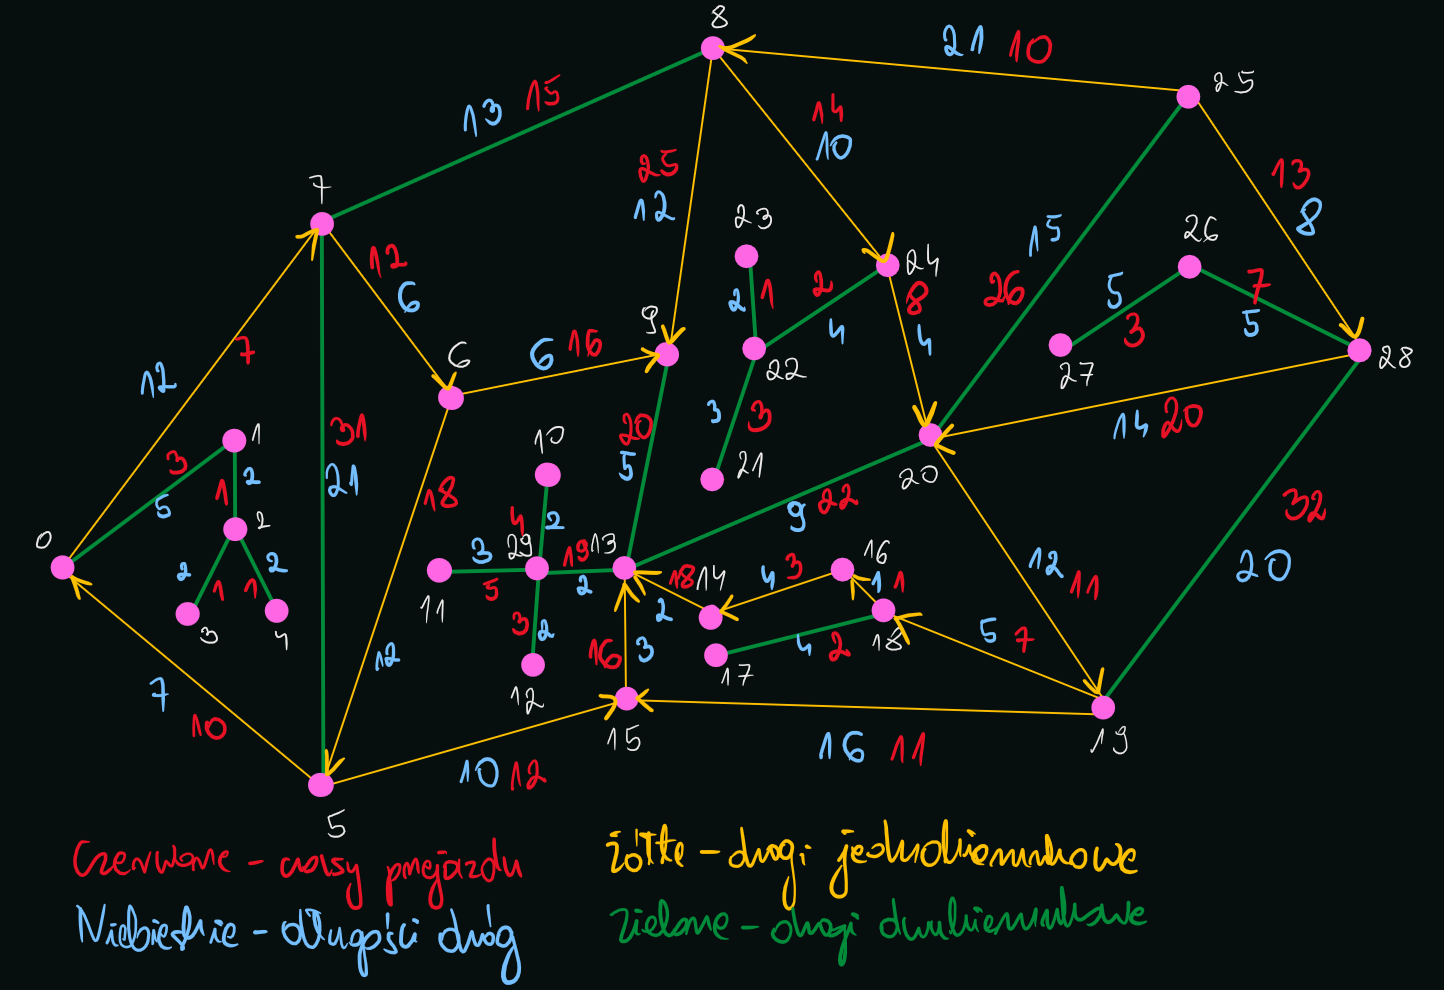

In [45]:
E = [(0, 7, 7, 12), (0, 1, 3, 5), (1, 0, 3, 5), (1, 2, 1, 2), (2, 1, 1, 2), (2, 3, 1, 2), (3, 2, 1, 2),
     (2, 4, 1, 2), (4, 2, 1, 2), (5, 0, 10, 7), (5, 7, 31, 21), (5, 15, 12, 10), (6, 9, 16, 6), (6, 5, 18, 12),
     (7, 5, 31, 21), (7, 6, 12, 6), (7, 8, 15, 13), (8, 7, 13, 15), (8, 9, 25, 12), (8, 24, 14, 10),
     (9, 13, 20, 5), (10, 29, 4, 2), (11, 29, 5, 3), (12, 29, 3, 2), (13, 29, 19, 2), (13, 9, 20, 5), 
     (13, 20, 22, 9), (14, 13, 18, 2), (15, 13, 16, 3), (16, 14, 3, 4), (17, 18, 2, 4), (18, 17, 2, 4), 
     (18, 16, 1, 1), (19, 28, 32, 20), (19, 18, 7, 5), (19, 15, 11, 16), (20, 19, 11, 12), (20, 13, 22, 9),
     (20, 25, 26, 15), (21, 22, 3, 3), (22, 21, 3, 3), (22, 23, 1, 2), (22, 24, 2, 4), (23, 22, 1, 2), 
     (24, 22, 2, 4), (24, 20, 8, 4), (25, 20, 26, 15), (25, 28, 13, 8), (25, 8, 10, 21), (26, 27, 3, 5), 
     (26, 28, 7, 5), (27, 26, 3, 5), (28, 26, 7, 5), (28, 20, 20, 14), (28, 19, 32, 20), (29, 10, 4, 2), 
     (29, 11, 5, 3), (29, 12, 3, 2), (29, 13, 19, 2)]

G = create_city_graph(E)
shortest_route = shortest_route_init(G)

In [46]:
print(shortest_route(0, 28))

(83, 62, [0, 7, 8, 24, 20, 25, 28])


In [47]:
print(shortest_route(0, 11)) # Teraz jest tylko odtwarzana ścieżka

(79, 34, [0, 7, 6, 9, 13, 29, 11])


In [48]:
print(shortest_route(17, 11))

(48, 16, [17, 18, 16, 14, 13, 29, 11])


In [49]:
print(shortest_route(27, 3))  # Objazd korków w centrum

(124, 109, [27, 26, 28, 20, 25, 8, 7, 6, 5, 0, 1, 2, 3])
